In [ ]:
try:
  import pyLDAvis
except:
  !pip install pyLDAvis==2.1.2
  import pyLDAvis
try:
  import tmtoolkit
except:
  !pip install tmtoolkit
  import tmtoolkit

import nltk
import random
import numpy as np
from tmtoolkit.corpus import Corpus
import json

try:
  from lda import LDA
except: 
  !pip install lda
  from lda import LDA

import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

import pickle
import scipy.sparse

random.seed(20191120)   # to make the sampling reproducible
np.set_printoptions(precision=5)

     |████████████████████████████████| 1.6MB 16.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=bf95dc7b141f147ecad22bc6f0ed37eb28da8099a4455c04c0c69fa848505208
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis
     |████████████████████████████████| 7.2MB 11.8MB/s 
     |████████████████████████████████| 25.9MB 1.4MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 
     |████████████████████████████████| 10.4MB 60.3MB/s 
     |████████████████████████████████| 11.5MB 56.8MB/s 
     |████████████████████████████████| 1.1MB 36.9MB/s 
  Created wheel for globre: filename=globre-0.1.5-cp36-none-any.whl size=19529 sha256=4b8b51245a605cd844c6ef9a52c93365ace1f8bdca82f3f749e17d1b6f5b1677
  Stored in directory: /root/.cache/pip/wheels/c4/3f/7f/be546f6d880521a8a7a1fe84cbe135fa859be63084682d3292
Successfully built globre
ERROR: albumentations 0.1.12 h

     |████████████████████████████████| 358kB 11.0MB/s 
     |████████████████████████████████| 102kB 7.1MB/s 


In [ ]:
working_directory = '/content/drive/MyDrive/MSDS_marketing_text_analytics/master_files/2_topic_modeling'
json_path = "%s/allnikereviews.json" % working_directory
#https://tmtoolkit.readthedocs.io/en/latest/text_corpora.html


In [ ]:
doc_labels = pickle.load(open('%s/doc_labels.p' % working_directory, 'rb'))

dtm_sm = scipy.sparse.load_npz('%s/small_dtm.npz' % working_directory)
dtm_bg = scipy.sparse.load_npz('%s/big_dtm.npz' % working_directory)

vocab_bg = pickle.load(open('%s/big_vocab.p' % working_directory, 'rb'))
vocab_sm = pickle.load(open('%s/small_vocab.p' % working_directory, 'rb'))

corpus = pickle.load(open('%s/corpus.p' % working_directory, 'rb'))

In [ ]:
# suppress the "INFO" messages and warnings from lda
logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

# Creating Models

In [ ]:

# set data to use
dtms = {
    'smaller': dtm_sm
}

# and fixed hyperparameters
lda_params = {
    'n_topics': 25,
    'eta': .5,
    'alpha': 1/25,
    'n_iter': 1000,
    'random_state': 20191122  # to make results reproducible
}

models = compute_models_parallel(dtms, constant_parameters=lda_params)

In [ ]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words
model_sm = models['smaller'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n=3)

topic_1
> #1. last (0.058698)
> #2. well (0.052642)
> #3. good (0.050838)
topic_2
> #1. like (0.076482)
> #2. look (0.067033)
> #3. good (0.048961)
topic_3
> #1. love (0.153658)
> #2. comfortable (0.067928)
> #3. buy (0.058713)
topic_4
> #1. love (0.051537)
> #2. order (0.050522)
> #3. great (0.050087)
topic_5
> #1. buy (0.046750)
> #2. would (0.038330)
> #3. wear (0.036274)
topic_6
> #1. good (0.094900)
> #2. run (0.090331)
> #3. great (0.052791)
topic_7
> #1. wide (0.074535)
> #2. fit (0.053677)
> #3. narrow (0.051438)
topic_8
> #1. small (0.095037)
> #2. order (0.067662)
> #3. run (0.067067)
topic_9
> #1. really (0.102960)
> #2. like (0.099309)
> #3. good (0.088745)
topic_10
> #1. back (0.048214)
> #2. order (0.047542)
> #3. send (0.043846)
topic_11
> #1. great (0.088572)
> #2. wear (0.080400)
> #3. comfortable (0.057644)
topic_12
> #1. recommend (0.128326)
> #2. would (0.109167)
> #3. great (0.089343)
topic_13
> #1. buy (0.076071)
> #2. wear (0.064504)
> #3. one (0.047978)
topic_14

# Topic Names and Classification

In [ ]:
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words

doc_lengths_sm = doc_lengths(dtm_sm)
topic_labels = generate_topic_labels_from_top_words(
    model_sm.topic_word_,
    model_sm.doc_topic_,
    doc_lengths_sm,
    vocab_sm,
    lambda_=0.7
)

In [ ]:
topic_labels

array(['1_last_long', '2_like_look', '3_love_comfortable',
       '4_arrive_exactly', '5_buy_would', '6_run_good', '7_wide_narrow',
       '8_small_order', '9_really_like', '10_send_back', '11_great_wear',
       '12_recommend_would', '13_buy_one', '14_find_hard',
       '15_wear_first', '16_feel_walk', '17_white_black', '18_use_run',
       '19_great_fit', '20_true_size', '21_good_excellent',
       '22_easy_clean', '23_get_know', '24_12_wear',
       '25_recommend_comfortable'], dtype='<U24')

In [ ]:
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
doc_topic = model_sm.doc_topic_
documentclassifications = ldamodel_top_doc_topics(doc_topic, doc_labels, top_n=2, topic_labels=topic_labels) 

In [ ]:
documentclassifications.head()

,rank_1,rank_2
document,,
0,17_white_black (0.755),18_use_run (0.13)
1,20_true_size (0.4489),2_like_look (0.1156)
10,17_white_black (0.736),25_recommend_comfortable (0.2027)
100,25_recommend_comfortable (0.736),14_find_hard (0.136)
1000,25_recommend_comfortable (0.4314),6_run_good (0.2171)


In [ ]:
documentclassifications['text'] = np.nan
for index, arow in documentclassifications.iterrows():
  documentclassifications['text'][index] = corpus[index]

In [ ]:
documentclassifications.loc['1']

rank_1                                20_true_size (0.4489)
rank_2                                 2_like_look (0.1156)
text      Very cute and is really practical. Fits better...
Name: 1, dtype: object

In [ ]:
documentclassifications.loc['1']['text']

'Very cute and is really practical. Fits better on smaller wrists which is my case. I wear them everywhere. I really love this watch!'

In [ ]:
documentclassifications.head()

,rank_1,rank_2,text
document,,,
0,17_white_black (0.755),18_use_run (0.13),the colour i received is not blue as shown but...
1,20_true_size (0.4489),2_like_look (0.1156),Very cute and is really practical. Fits better...
10,17_white_black (0.736),25_recommend_comfortable (0.2027),I own three of these watches. They are perfect...
100,25_recommend_comfortable (0.736),14_find_hard (0.136),These shoes lived up to my hopes after seeing ...
1000,25_recommend_comfortable (0.4314),6_run_good (0.2171),"Absolutly great shoe, I was having a lot of ca..."


In [ ]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('battery')]
lookup.head()

Results:


,rank_1,rank_2,text
document,,,
1125,13_buy_one (0.3622),18_use_run (0.3622),"Still works, but the battery needs replacing, ..."
1142,2_like_look (0.4583),18_use_run (0.2583),Buying a watch online that you have never seen...
1165,8_small_order (0.505),4_arrive_exactly (0.255),This seems to be an excellent buy. Very large...
1166,18_use_run (0.4626),23_get_know (0.1805),I've received so many compliments on this watc...
1214,18_use_run (0.808),25_recommend_comfortable (0.008),my husband is in the navy and through bootcamp...


In [ ]:
documentclassifications.to_excel('%s/topics.documentclassification.xlsx' % working_directory)

In [ ]:
from tmtoolkit.topicmod.visualize import parameters_for_ldavis

ldavis_params = parameters_for_ldavis(model_sm.topic_word_,
                                      model_sm.doc_topic_,
                                      dtm_sm,
                                      vocab_sm)

In [ ]:
%matplotlib inline
vis = pyLDAvis.prepare(**ldavis_params)
pyLDAvis.enable_notebook(local=True)
pyLDAvis.display(vis)

In [ ]:
from tmtoolkit.topicmod.visualize import generate_wordclouds_for_topic_words

# some options for wordcloud output
img_w = 400   # image width
img_h = 300   # image height

topic_clouds = generate_wordclouds_for_topic_words(
    model_sm.topic_word_, vocab_sm,
    top_n=20, topic_labels=topic_labels,
    width=img_w, height=img_h
)

# show all generated word clouds
topic_clouds.keys()

dict_keys(['1_last_long', '2_like_look', '3_love_comfortable', '4_arrive_exactly', '5_buy_would', '6_run_good', '7_wide_narrow', '8_small_order', '9_really_like', '10_send_back', '11_great_wear', '12_recommend_would', '13_buy_one', '14_find_hard', '15_wear_first', '16_feel_walk', '17_white_black', '18_use_run', '19_great_fit', '20_true_size', '21_good_excellent', '22_easy_clean', '23_get_know', '24_12_wear', '25_recommend_comfortable'])

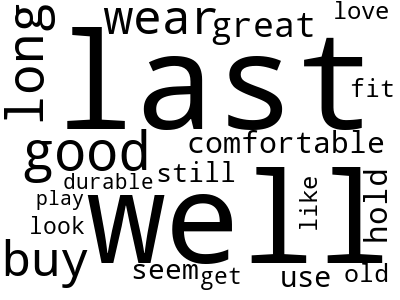

In [ ]:
topic_clouds['1_last_long']